In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r'C:\Users\Mangesh\Desktop\1 month\Projects\OTT Platform Business Analysis\Dataset\cleaned_dataset.csv')

In [4]:
df.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6
1,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,TV-G,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],Not Applicable,8.2,89766.0,8.647,8.0
2,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,TV-G,171,"['romance', 'war', 'drama']",['US'],Not Applicable,8.1,63026.0,8.435,7.8
3,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,TV-G,92,"['comedy', 'drama', 'romance']",['US'],Not Applicable,7.8,57835.0,11.270,7.4
4,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,TV-G,94,"['thriller', 'drama', 'romance']",['US'],Not Applicable,7.9,30924.0,8.273,7.6


In [5]:
df.columns

Index(['title', 'type', 'description', 'release_year', 'age_certification',
       'runtime', 'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

# 1. Identifying the different types of content available on the platform. 

In [6]:
dfgrp1 = df.groupby(['type']).nunique().reset_index()

In [7]:
dfgrp1[['type', 'title']]

,type,title
0,MOVIE,8418
1,SHOW,1355


In [8]:
dfgrp1['title'] = dfgrp1['title'].astype('float')

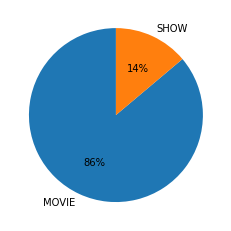

In [9]:
plt.pie(dfgrp1['title'],labels = dfgrp1['type'] , autopct = '%1.0f%%', startangle = 90)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9868 entries, 0 to 9867
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9868 non-null   object 
 1   type                  9868 non-null   object 
 2   description           9868 non-null   object 
 3   release_year          9868 non-null   int64  
 4   age_certification     9868 non-null   object 
 5   runtime               9868 non-null   int64  
 6   genres                9868 non-null   object 
 7   production_countries  9868 non-null   object 
 8   seasons               9868 non-null   object 
 9   imdb_score            9868 non-null   float64
 10  imdb_votes            9868 non-null   float64
 11  tmdb_popularity       9868 non-null   float64
 12  tmdb_score            9868 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1002.3+ KB


<Axes: xlabel='production_countries', ylabel='percent'>

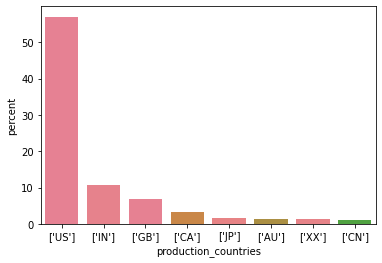

In [11]:
sns.countplot(x='production_countries', data = df,order = df['production_countries'].value_counts().index[:8] ,
              linewidth =5 , hue = 'production_countries',stat="percent")

<Axes: xlabel='genres', ylabel='percent'>

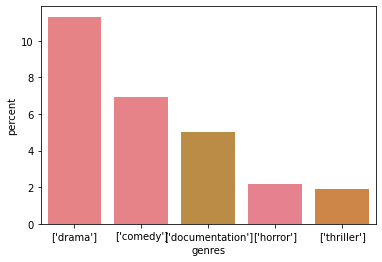

In [12]:
sns.countplot(x='genres', data = df,order = df['genres'].value_counts().index[:5] ,linewidth =5 ,hue = 'genres'
              ,stat="percent")

<Axes: xlabel='age_certification', ylabel='percent'>

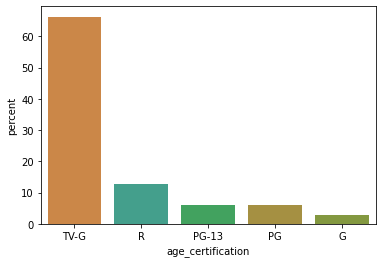

In [13]:
sns.countplot(x='age_certification', data = df,order = df['age_certification'].value_counts().index[:5] ,
              linewidth =5 , hue = 'age_certification',stat="percent")

# Study the popularity of different types of content around the world

1. Assessing the popularity of type of content

In [14]:
dfgrp2 = df.groupby(['type'])

In [15]:
dfgrp2 = dfgrp2[['imdb_score','tmdb_popularity','tmdb_score']].mean().reset_index()

In [16]:
dfgrp2[['imdb_score','tmdb_popularity','tmdb_score']]

,imdb_score,tmdb_popularity,tmdb_score
0,5.832147,5.604632,5.834038
1,6.975018,13.348922,6.949742


[]

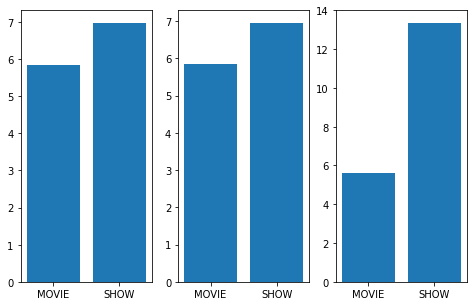

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(8, 5), sharex=False, sharey=False)

ax[0].bar(height = dfgrp2['imdb_score'] , x = dfgrp2['type'] )
ax[1].bar(height = dfgrp2['tmdb_score'] , x = dfgrp2['type'] )
ax[2].bar(height = dfgrp2['tmdb_popularity'] , x = dfgrp2['type'] )
plt.plot()

In [18]:
dfgrp3 = df.groupby(['genres'])
dfgrp3 = dfgrp3[['imdb_score','tmdb_popularity','tmdb_score']].mean().reset_index()
dfgrp3[['imdb_score','tmdb_popularity','tmdb_score']]

,imdb_score,tmdb_popularity,tmdb_score
0,7.700000,1.101570,7.500000
1,7.100000,29.598000,7.400000
2,5.300000,49.848000,5.200000
3,8.100000,52.173000,8.500000
4,8.800000,12.306000,8.700000
...,...,...,...
2022,5.650000,4.603500,5.800000
2023,6.200000,5.925000,5.800000
2024,6.400000,7.146000,5.800000
2025,3.800000,1.952000,4.650000


In [19]:
dfgrp3_1 = dfgrp3.sort_values(by='imdb_score', ascending  = False).iloc[0:5]
dfgrp3_2 = dfgrp3.sort_values(by='tmdb_score', ascending  = False).iloc[0:5]
dfgrp3_3 = dfgrp3.sort_values(by='tmdb_popularity', ascending  = False).iloc[0:5]

In [20]:
dfgrp3_1[['genres','imdb_score']]

,genres,imdb_score
1209,"['history', 'romance']",9.0
1350,"['music', 'animation', 'action', 'comedy', 'dr...",9.0
957,"['drama', 'sport', 'documentation']",8.9
1668,"['sport', 'action', 'drama', 'family']",8.9
835,"['drama', 'family', 'war', 'animation', 'europ...",8.9


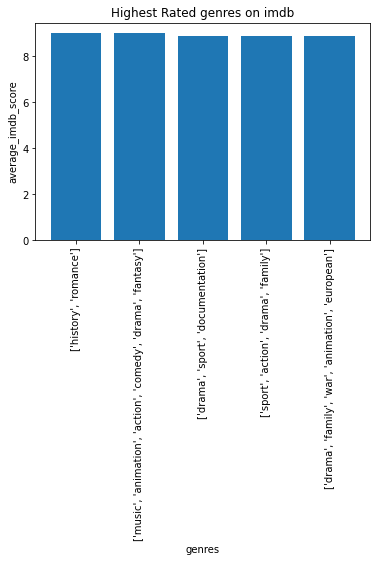

In [21]:
plt.bar(height = dfgrp3_1['imdb_score'], x = dfgrp3_1['genres'])
plt.xticks(x = dfgrp3_1['genres'], rotation = 'vertical')
plt.xlabel('genres')
plt.ylabel('average_imdb_score')
plt.title('Highest Rated genres on imdb')
plt.show()

In [22]:
dfgrp3_2[['genres','tmdb_score']]

,genres,tmdb_score
1776,"['thriller', 'documentation', 'western']",10.0
78,"['action', 'drama', 'horror', 'scifi', 'thrill...",10.0
568,"['crime', 'scifi', 'action']",10.0
1073,"['family', 'fantasy', 'scifi', 'animation']",10.0
1078,"['family', 'romance']",10.0


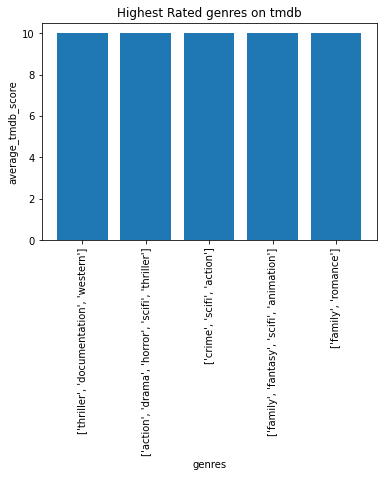

In [23]:
plt.bar(height = dfgrp3_2['tmdb_score'], x = dfgrp3_2['genres'])
plt.xticks(x = dfgrp3_2['genres'], rotation = 'vertical')
plt.xlabel('genres')
plt.ylabel('average_tmdb_score')
plt.title('Highest Rated genres on tmdb')
plt.show()

In [24]:
dfgrp3_3[['genres','tmdb_popularity']]

,genres,tmdb_popularity
1160,"['fantasy', 'romance', 'animation', 'comedy', ...",934.545
1513,"['scifi', 'action', 'comedy', 'family', 'fanta...",893.650
1106,"['fantasy', 'comedy', 'family', 'animation', '...",482.744
1338,"['horror', 'thriller', 'drama', 'scifi']",389.431
100,"['action', 'drama', 'war', 'history', 'romance...",344.245


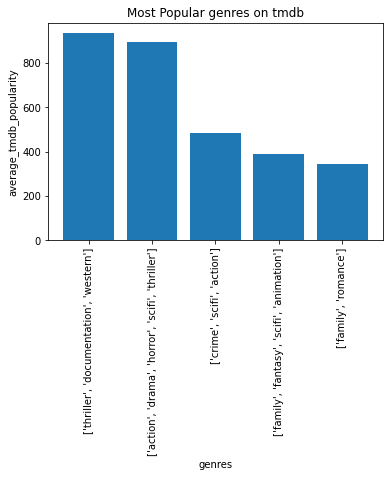

In [25]:
plt.bar(height = dfgrp3_3['tmdb_popularity'], x = dfgrp3_2['genres'])
plt.xticks(x = dfgrp3_3['genres'], rotation = 'vertical')
plt.xlabel('genres')
plt.ylabel('average_tmdb_popularity')
plt.title('Most Popular genres on tmdb')
plt.show()

In [26]:
dfgrp6 = df.groupby(['production_countries'])
dfgrp6 = dfgrp6[['imdb_score', 'imdb_votes','tmdb_popularity']].mean().reset_index()
dfgrp6_1 = dfgrp6.sort_values(by=['imdb_score','imdb_votes'], ascending  = [False,False]).iloc[0:5]
dfgrp6_1

,production_countries,imdb_score,imdb_votes,tmdb_popularity
245,['HU'],9.0,5.0,3.340
12,"['AU', 'CA', 'GB']",8.8,19.0,0.916
263,"['IN', 'RU', 'GB']",8.7,38921.0,4.592
414,"['US', 'AL', 'GE', 'XK']",8.7,4633.0,2.784
84,"['CU', 'GB']",8.6,80.0,0.600


In [27]:
dfgrp6_2 = dfgrp6.sort_values(by='tmdb_popularity', ascending  = False).iloc[0:5]
dfgrp6_2

,production_countries,imdb_score,imdb_votes,tmdb_popularity
298,"['JP', 'US']",5.525,37622.5,231.2145
423,"['US', 'CA', 'JP']",5.300,35173.0,182.7380
16,"['AU', 'GB', 'US']",6.200,231965.0,174.6070
45,"['CA', 'GB', 'US']",5.675,19968.0,129.6260
443,"['US', 'GB', 'NZ']",6.600,167883.0,102.0730


In [30]:
df_age_cert = df.groupby(['age_certification'])
df_age_cert = df_age_cert[['imdb_score', 'imdb_votes','tmdb_popularity']].mean().reset_index()
df_age_cert_imdb = df_age_cert.sort_values(by=['imdb_score'], ascending  = [False]).iloc[0:5]
df_age_cert_imdb

,age_certification,imdb_score,imdb_votes,tmdb_popularity
8,TV-PG,7.372527,10387.582418,15.137978
7,TV-MA,7.335945,29038.668203,27.245774
5,TV-14,6.976596,20704.920213,21.873359
10,TV-Y7,6.619231,3797.211538,15.524365
9,TV-Y,6.479487,1337.185897,10.350731


In [31]:
df_age_cert_tmdb = df_age_cert.sort_values(by=['tmdb_popularity'], ascending  = [False]).iloc[0:5]
df_age_cert_tmdb

,age_certification,imdb_score,imdb_votes,tmdb_popularity
7,TV-MA,7.335945,29038.668203,27.245774
5,TV-14,6.976596,20704.920213,21.873359
10,TV-Y7,6.619231,3797.211538,15.524365
8,TV-PG,7.372527,10387.582418,15.137978
3,PG-13,5.984014,33801.960034,11.290699


# Analyzing the trends over the years 

1. Trend in the production of shows over the years

In [32]:
dfgrp5_1 = df[df['type'] == 'SHOW'].groupby(['release_year'])
dfgrp5_1 = dfgrp5_1.nunique().reset_index()
dfgrp5_1

,release_year,title,type,description,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1934,1,1,1,1,1,1,1,1,1,1,1,1
1,1950,1,1,1,1,1,1,1,1,1,1,1,1
2,1951,1,1,1,1,1,1,1,1,1,1,1,1
3,1952,1,1,1,1,1,1,1,1,1,1,1,1
4,1953,2,1,2,1,1,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2018,117,1,116,6,55,82,19,6,41,94,92,34
60,2019,104,1,101,6,46,60,18,5,40,85,75,36
61,2020,124,1,120,6,55,57,21,4,36,77,92,33
62,2021,141,1,130,5,52,63,21,2,46,88,98,36


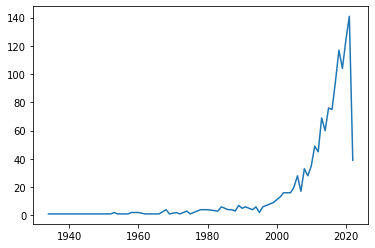

In [33]:
plt.plot(dfgrp5_1['release_year'] , dfgrp5_1['title'])
plt.show()

In [34]:
dfgrp5_2 = df[df['type'] == 'MOVIE'].groupby(['release_year'])
dfgrp5_2 = dfgrp5_2.nunique().reset_index()
dfgrp5_2


,release_year,title,type,description,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1912,1,1,1,1,1,1,1,1,1,1,1,1
1,1914,2,1,2,1,2,2,1,1,2,2,2,2
2,1915,5,1,5,1,3,4,1,1,4,5,5,4
3,1916,2,1,2,1,2,2,1,1,2,2,2,2
4,1917,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2018,568,1,559,6,119,217,83,1,66,428,439,57
106,2019,703,1,695,5,134,252,102,1,68,473,545,66
107,2020,574,1,554,6,122,178,62,1,69,344,428,62
108,2021,713,1,691,6,131,204,52,1,76,409,496,65


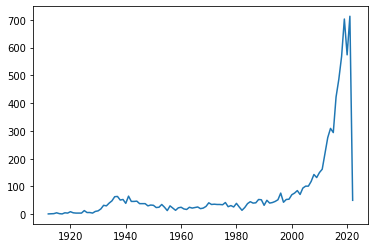

In [35]:
plt.plot(dfgrp5_2['release_year'] , dfgrp5_2['title'])
plt.show()